<a href="https://colab.research.google.com/github/asenarmour/Google_colab/blob/master/Learn_together.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anuragnegi","key":"89c411b5334efd3935671c1d7256b358"}'}

In [0]:
 !mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c learn-together

  0% 0.00/1.19M [00:00<?, ?B/s]
100% 1.19M/1.19M [00:00<00:00, 81.2MB/s]
 75% 9.00M/11.9M [00:00<00:00, 24.6MB/s]
100% 11.9M/11.9M [00:00<00:00, 26.9MB/s]
  0% 0.00/351k [00:00<?, ?B/s]
100% 351k/351k [00:00<00:00, 110MB/s]


In [0]:
!ls

kaggle.json  sample_submission.csv.zip	train.csv.zip
sample_data  test.csv.zip


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import gc
from sklearn.preprocessing import MinMaxScaler

In [0]:
train=pd.read_csv('train.csv.zip')
test=pd.read_csv('test.csv.zip')
sample_submission=pd.read_csv('sample_submission.csv.zip')

In [0]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


**ploting the boxplot of continues variables**

Text(0, 0.5, 'Horizontal_Distance_To_Fire_Points')

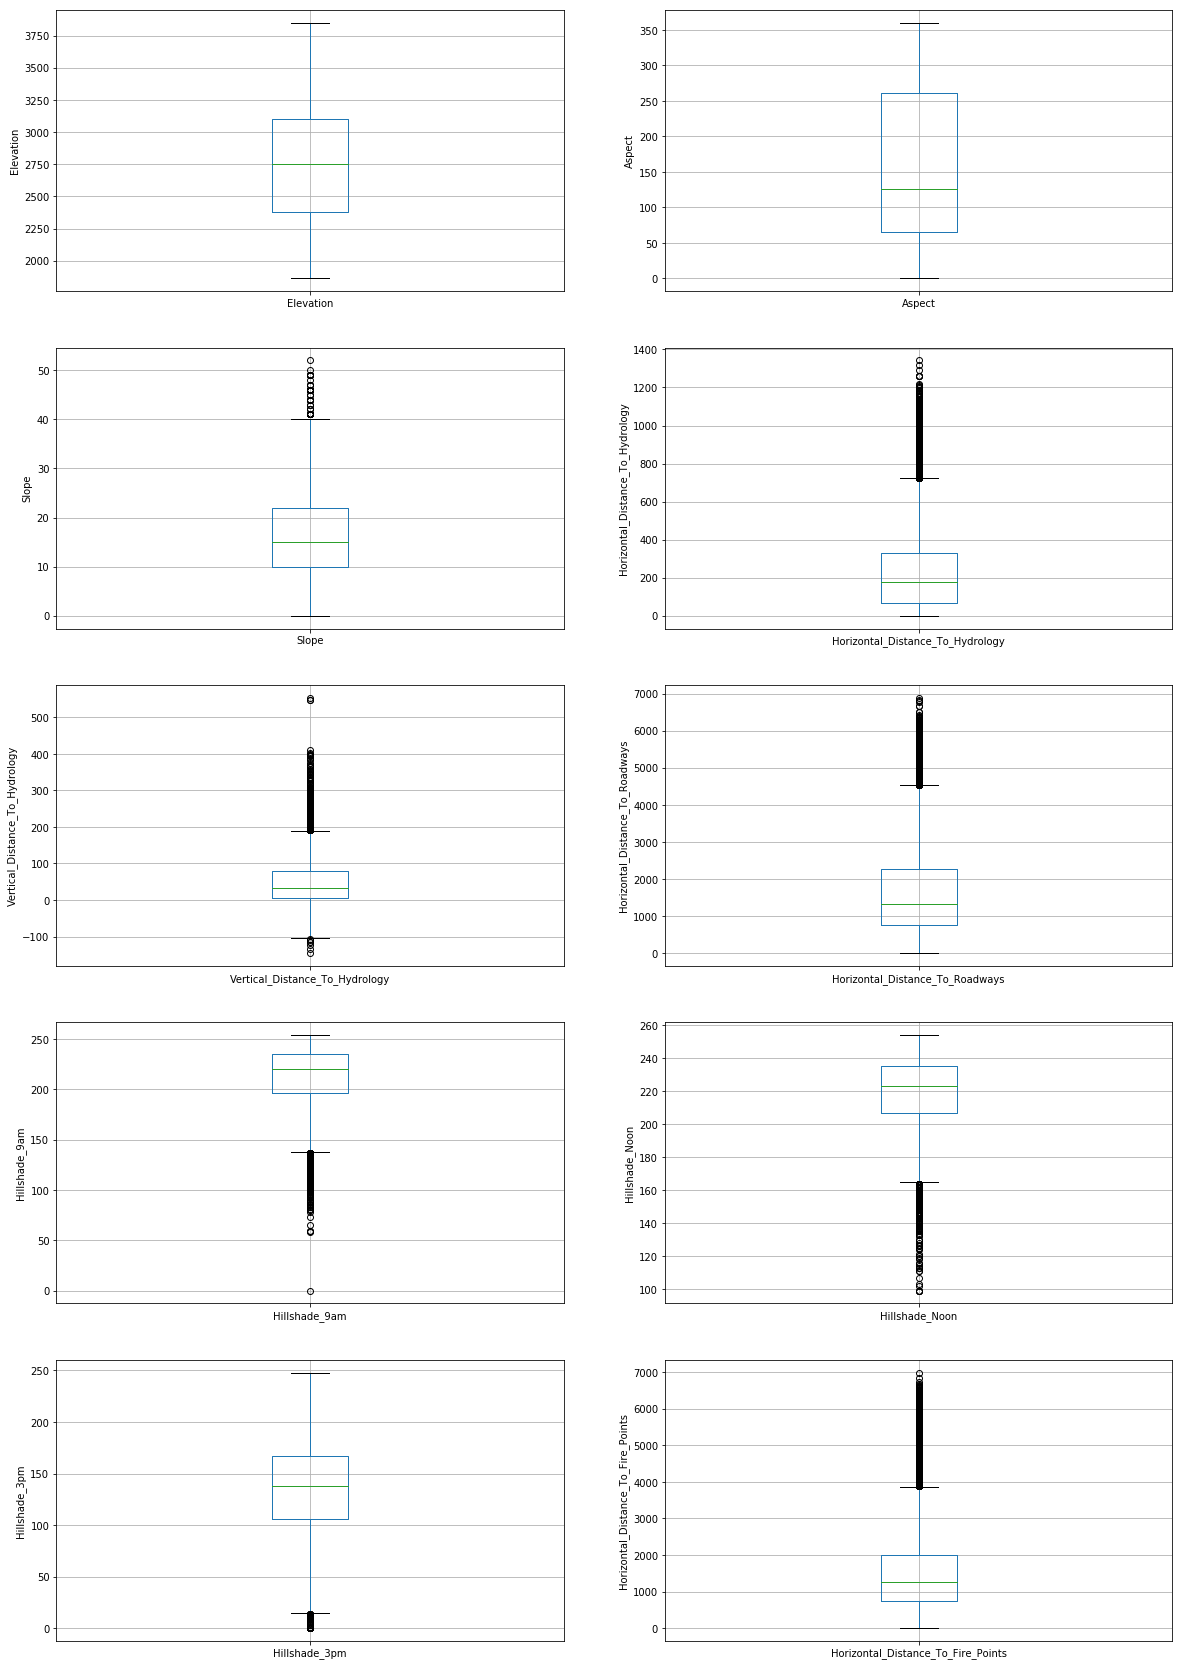

In [0]:
plt.figure(figsize=(20,30))
plt.subplot(5, 2, 1)
fig = train.boxplot(column='Elevation')
fig.set_title('')
fig.set_ylabel('Elevation')
 
plt.subplot(5, 2, 2)
fig = train.boxplot(column='Aspect')
fig.set_title('')
fig.set_ylabel('Aspect')

plt.subplot(5, 2, 3)
fig = train.boxplot(column='Slope')
fig.set_title('')
fig.set_ylabel('Slope')
 
plt.subplot(5, 2, 4)
fig = train.boxplot(column='Horizontal_Distance_To_Hydrology')
fig.set_title('')
fig.set_ylabel('Horizontal_Distance_To_Hydrology')

plt.subplot(5, 2, 5)
fig = train.boxplot(column='Vertical_Distance_To_Hydrology')
fig.set_title('')
fig.set_ylabel('Vertical_Distance_To_Hydrology')
 
plt.subplot(5, 2, 6)
fig = train.boxplot(column='Horizontal_Distance_To_Roadways')
fig.set_title('')
fig.set_ylabel('Horizontal_Distance_To_Roadways')

plt.subplot(5, 2, 7)
fig = train.boxplot(column='Hillshade_9am')
fig.set_title('')
fig.set_ylabel('Hillshade_9am')
 
plt.subplot(5, 2, 8)
fig = train.boxplot(column='Hillshade_Noon')
fig.set_title('')
fig.set_ylabel('Hillshade_Noon')

plt.subplot(5, 2, 9)
fig = train.boxplot(column='Hillshade_3pm')
fig.set_title('')
fig.set_ylabel('Hillshade_3pm')
 
plt.subplot(5, 2, 10)
fig = train.boxplot(column='Horizontal_Distance_To_Fire_Points')
fig.set_title('')
fig.set_ylabel('Horizontal_Distance_To_Fire_Points')


**Outliers:**
all columns other than elevation and aspect has outliers

**Handling outliers:**

1.top_coding:Slope

2.bottom_coding:Hillshade_3pm

3.discretisation:all the other columns.

In [0]:
X_train=train.copy()
x_test=test.copy()

**Getting the interquantile range of slope and finding the outliers**

In [0]:
IQR = X_train.Slope.quantile(0.75) - X_train.Slope.quantile(0.25) #finding interquantile range
Lower_fence = X_train.Slope.quantile(0.25) - (IQR * 1.5)          #lower value
Upper_fence = X_train.Slope.quantile(0.75) + (IQR * 1.5)          #upper value
print('slope number outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
Slope = len(X_train[X_train.Slope>Upper_fence]) / np.float(len(X_train))
print('Number of Slope with values higher than {upperboundary}: {slope}'.format(upperboundary=Upper_fence, slope=Slope))

**Hillshade_3pm**

In [0]:
IQR2 = X_train.Hillshade_3pm.quantile(0.75) - X_train.Hillshade_3pm.quantile(0.25)
Lower_fence = X_train.Hillshade_3pm.quantile(0.25) - (IQR2 * 1.5)
Upper_fence = X_train.Hillshade_3pm.quantile(0.75) + (IQR2 * 1.5)
print('Hillshade_3pm number outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
Hillshades_3pm = len(X_train[X_train.Hillshade_3pm<Lower_fence]) / np.float(len(X_train))
print('Number of Hillshade_3pm with values lower than {lowerboundary}: {Hillshade_3pm}'.format(lowerboundary=Lower_fence, Hillshade_3pm=Hillshades_3pm))

Hillshade_3pm number outliers are values < 14.5 or > 258.5
Number of Hillshade_3pm with values lower than 14.5: 0.0082010582010582


In [0]:
x_test['Cover_Type']='test'

**Top_coding Slope**

In [0]:
def top_code(df, variable, top):                            #function to top_code values
    return np.where(df[variable]>top, top, df[variable])
def bottom_code(df, variable, bottom):                      #function to bottom values
    return np.where(df[variable]<bottom, bottom, df[variable])
  #top_coding slope
X_train['Slope']= top_code(X_train, 'Slope', 40)            
x_test['Slope']= top_code(x_test,'Slope',40)

#bottom coding Hillshade_3pm
X_train['Hillshade_3pm']=bottom_code(X_train,'Hillshade_3pm',14)
x_test['Hillshade_3pm']=bottom_code(x_test,'Hillshade_3pm',14)

**.discretisation: Horizontal_Distance_To_Hydrology**

Text(0, 0.5, 'Cover_Type')

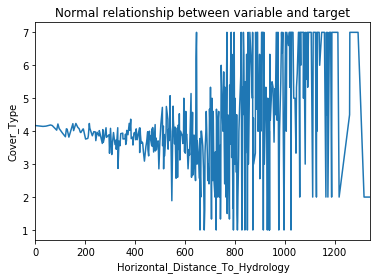

In [0]:
fig = plt.figure()
fig =X_train.groupby(['Horizontal_Distance_To_Hydrology'])['Cover_Type'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Cover_Type')

distance between 0 to 600 are more likely to to have cover of 3,4,5

distance >800 are most likely to have cover type 6 and 7


**discretising values::**

In [0]:
# find quantiles and discretise train set
X_train['Horizontal_Distance_To_Hydrology'], bins = pd.qcut(x=X_train['Horizontal_Distance_To_Hydrology'], q=8, retbins=True, precision=3, duplicates='raise')
x_test['Horizontal_Distance_To_Hydrology'] = pd.cut(x = x_test['Horizontal_Distance_To_Hydrology'], bins=bins, include_lowest=True)

In [0]:
t1 = X_train.groupby(['Horizontal_Distance_To_Hydrology'])['Horizontal_Distance_To_Hydrology'].count() / np.float(len(X_train))
t3 = x_test.groupby(['Horizontal_Distance_To_Hydrology'])['Horizontal_Distance_To_Hydrology'].count() / np.float(len(x_test))

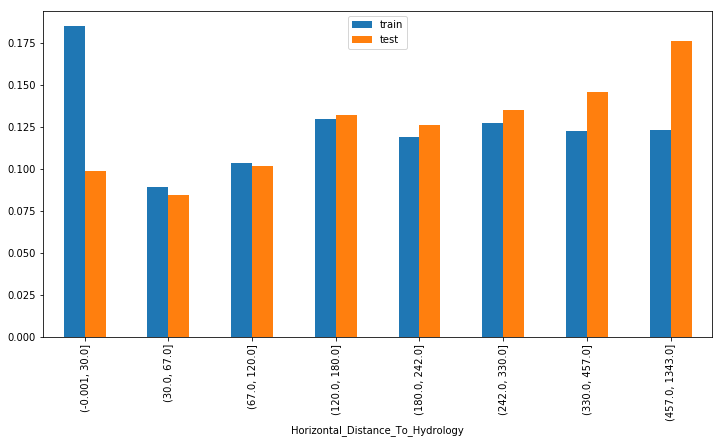

In [0]:
temp = pd.concat([t1,t3], axis=1)
temp.columns = ['train', 'test']
temp.plot.bar(figsize=(12,6))

Text(0, 0.5, 'Cover_Type')

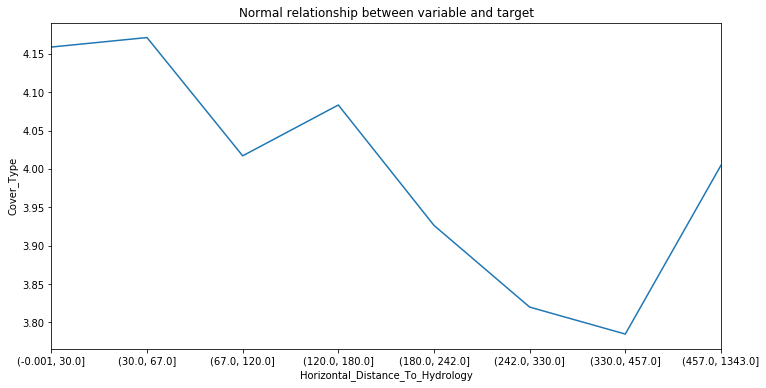

In [0]:
fig = plt.figure()
fig = X_train.groupby(['Horizontal_Distance_To_Hydrology'])['Cover_Type'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Cover_Type')

**till the distance of 457 as the horizontal_distance_to_hydrology increases the cover_types gets small and than it converses after 457**

**discretisation: Vertical_Distance_To_Hydrology**

In [0]:
# find quantiles and discretise train set
X_train['Vertical_Distance_To_Hydrology'], bins = pd.qcut(x=X_train['Vertical_Distance_To_Hydrology'], q=8, retbins=True, precision=3, duplicates='raise')
x_test['Vertical_Distance_To_Hydrology'] = pd.cut(x = x_test['Vertical_Distance_To_Hydrology'], bins=bins, include_lowest=True)

Text(0, 0.5, 'Cover_Type')

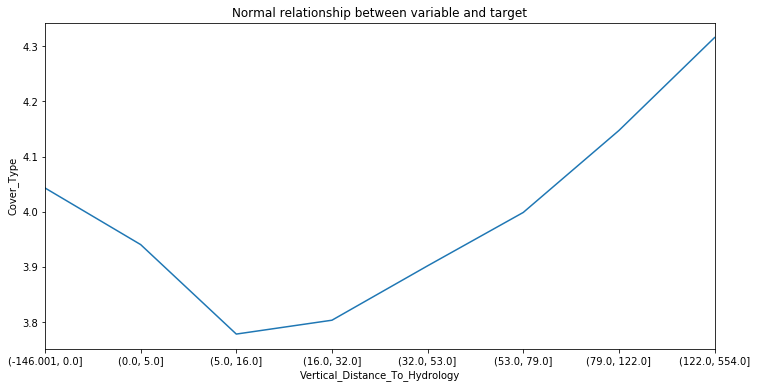

In [0]:
t1 = X_train.groupby(['Vertical_Distance_To_Hydrology'])['Vertical_Distance_To_Hydrology'].count() / np.float(len(X_train))
t3 = x_test.groupby(['Vertical_Distance_To_Hydrology'])['Vertical_Distance_To_Hydrology'].count() / np.float(len(x_test))
fig = plt.figure()
fig = X_train.groupby(['Vertical_Distance_To_Hydrology'])['Cover_Type'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Cover_Type')

**the cover type goes down till 16 and it starts rising up as the distance increases**

**Discretisation: Horizontal_Distance_To_Roadways**

In [0]:
# find quantiles and discretise train set
X_train['Horizontal_Distance_To_Roadways'], bins = pd.qcut(x=X_train['Horizontal_Distance_To_Roadways'], q=8, retbins=True, precision=3, duplicates='raise')
x_test['Horizontal_Distance_To_Roadways'] = pd.cut(x = x_test['Horizontal_Distance_To_Roadways'], bins=bins, include_lowest=True)

Text(0, 0.5, 'Cover_Type')

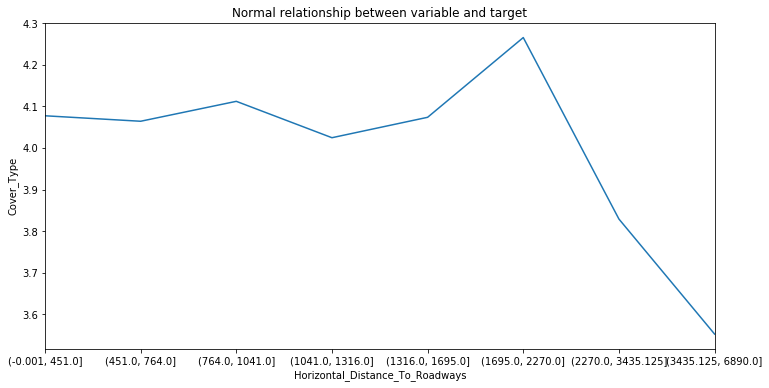

In [0]:
t1 = X_train.groupby(['Horizontal_Distance_To_Roadways'])['Horizontal_Distance_To_Roadways'].count() / np.float(len(X_train))
t3 = x_test.groupby(['Horizontal_Distance_To_Roadways'])['Horizontal_Distance_To_Roadways'].count() / np.float(len(x_test))
fig = plt.figure()
fig = X_train.groupby(['Horizontal_Distance_To_Roadways'])['Cover_Type'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Cover_Type')

**Discretisation: Hillshade_9am**

In [0]:
# find quantiles and discretise train set
X_train['Hillshade_9am'], bins = pd.qcut(x=X_train['Hillshade_9am'], q=8, retbins=True, precision=3, duplicates='raise')
x_test['Hillshade_9am'] = pd.cut(x = x_test['Hillshade_9am'], bins=bins, include_lowest=True)

Text(0, 0.5, 'Cover_Type')

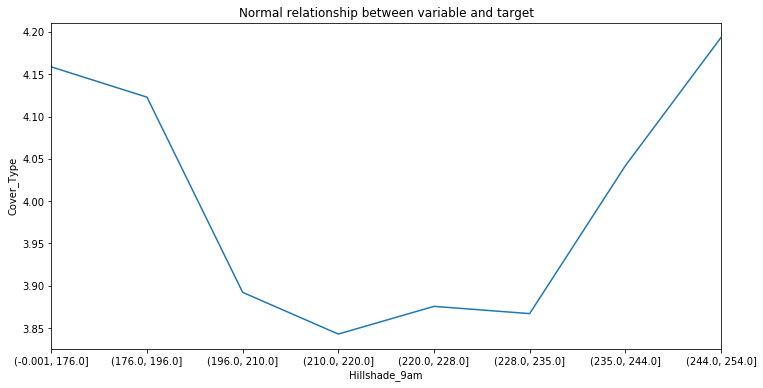

In [0]:
t1 = X_train.groupby(['Hillshade_9am'])['Hillshade_9am'].count() / np.float(len(X_train))
t3 = x_test.groupby(['Hillshade_9am'])['Hillshade_9am'].count() / np.float(len(x_test))
fig = plt.figure()
fig = X_train.groupby(['Hillshade_9am'])['Cover_Type'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Cover_Type')

**Discretisation: Hillshade_Noon**

In [0]:
# find quantiles and discretise train set
X_train['Hillshade_Noon'], bins = pd.qcut(x=X_train['Hillshade_Noon'], q=8, retbins=True, precision=3, duplicates='raise')
x_test['Hillshade_Noon'] = pd.cut(x = x_test['Hillshade_Noon'], bins=bins, include_lowest=True)

Text(0, 0.5, 'Cover_Type')

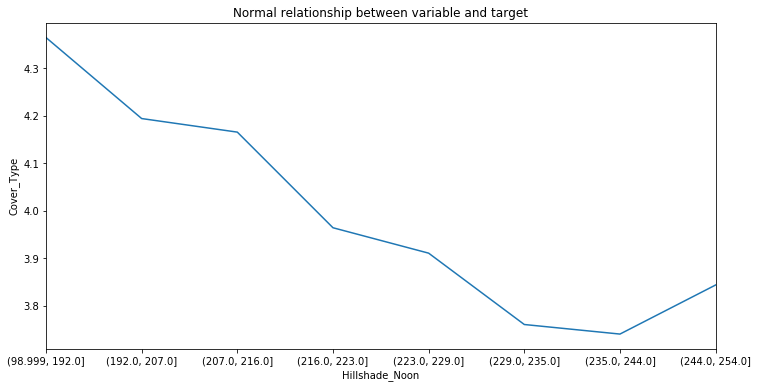

In [0]:
t1 = X_train.groupby(['Hillshade_Noon'])['Hillshade_Noon'].count() / np.float(len(X_train))
t3 = x_test.groupby(['Hillshade_Noon'])['Hillshade_Noon'].count() / np.float(len(x_test))
fig = plt.figure()
fig = X_train.groupby(['Hillshade_Noon'])['Cover_Type'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Cover_Type')

**Discretisaion: Hillshade_3pm**

In [0]:
# find quantiles and discretise train set
X_train['Hillshade_3pm'], bins = pd.qcut(x=X_train['Hillshade_3pm'], q=8, retbins=True, precision=3, duplicates='raise')
x_test['Hillshade_3pm'] = pd.cut(x = x_test['Hillshade_3pm'], bins=bins, include_lowest=True)

Text(0, 0.5, 'Cover_Type')

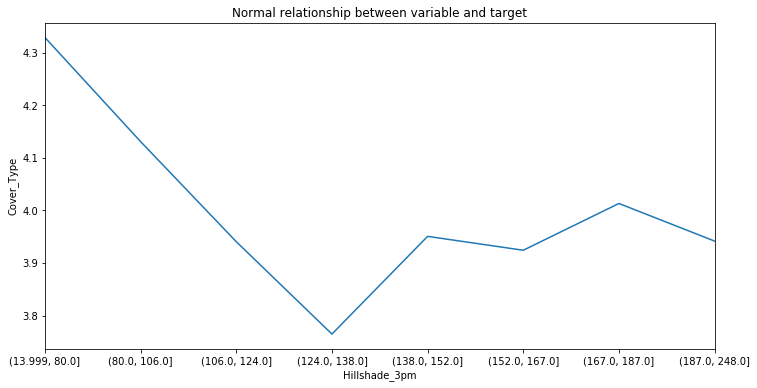

In [0]:
t1 = X_train.groupby(['Hillshade_3pm'])['Hillshade_3pm'].count() / np.float(len(X_train))
t3 = x_test.groupby(['Hillshade_3pm'])['Hillshade_3pm'].count() / np.float(len(x_test))
fig = plt.figure()
fig = X_train.groupby(['Hillshade_3pm'])['Cover_Type'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Cover_Type')

**Discretisation: Horizontal_Distance_To_Fire_Points**

In [0]:
# find quantiles and discretise train set
X_train['Horizontal_Distance_To_Fire_Points'], bins = pd.qcut(x=X_train['Horizontal_Distance_To_Fire_Points'], q=8, retbins=True, precision=3, duplicates='raise')
x_test['Horizontal_Distance_To_Fire_Points'] = pd.cut(x = x_test['Horizontal_Distance_To_Fire_Points'], bins=bins, include_lowest=True)

Text(0, 0.5, 'Cover_Type')

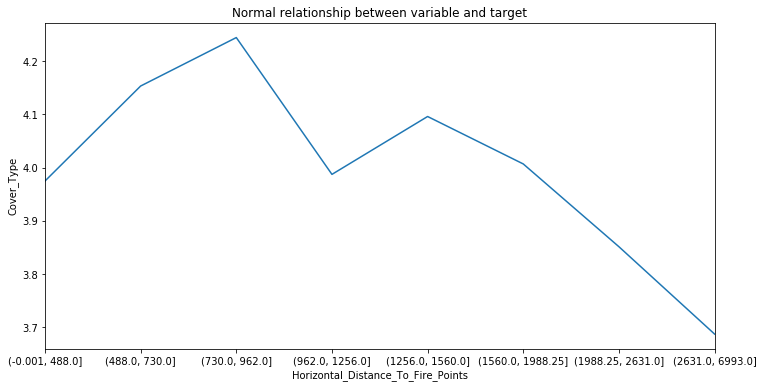

In [0]:
t1 = X_train.groupby(['Horizontal_Distance_To_Fire_Points'])['Horizontal_Distance_To_Fire_Points'].count() / np.float(len(X_train))
t3 = x_test.groupby(['Horizontal_Distance_To_Fire_Points'])['Horizontal_Distance_To_Fire_Points'].count() / np.float(len(x_test))
fig = plt.figure()
fig = X_train.groupby(['Horizontal_Distance_To_Fire_Points'])['Cover_Type'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Cover_Type')

**looking for missing values in test set**

**Discretisation has left some missing values in test set now we have to cap it to the (.75)quantile range or (0.25)**

In [0]:
x_test.Horizontal_Distance_To_Hydrology.isnull().sum() #their are 25 missing values in test set for this column

25

In [0]:
X_train.Horizontal_Distance_To_Hydrology.unique()

[(242.0, 330.0], (180.0, 242.0], (120.0, 180.0], (330.0, 457.0], (30.0, 67.0], (67.0, 120.0], (-0.001, 30.0], (457.0, 1343.0]]
Categories (8, interval[float64]): [(-0.001, 30.0] < (30.0, 67.0] < (67.0, 120.0] < (120.0, 180.0] <
                                    (180.0, 242.0] < (242.0, 330.0] < (330.0, 457.0] <
                                    (457.0, 1343.0]]

In [0]:
X_train.Horizontal_Distance_To_Hydrology.unique()[0]

Interval(242.0, 330.0, closed='right')

**imputing missing values**

In [0]:
x_test.loc[x_test.Horizontal_Distance_To_Hydrology.isnull(), 'Horizontal_Distance_To_Hydrology'] = X_train.Horizontal_Distance_To_Hydrology.unique()[0]
x_test.Horizontal_Distance_To_Hydrology.isnull().sum()

0

In [0]:
x_test.Vertical_Distance_To_Hydrology.isnull().sum() 

94

In [0]:
X_train.Vertical_Distance_To_Hydrology.unique()[0]

Interval(-146.001, 0.0, closed='right')

In [0]:
x_test.loc[x_test.Vertical_Distance_To_Hydrology.isnull(), 'Vertical_Distance_To_Hydrology'] = X_train.Vertical_Distance_To_Hydrology.unique()[0]
x_test.Vertical_Distance_To_Hydrology.isnull().sum()

0

In [0]:
x_test.Horizontal_Distance_To_Roadways.isnull().sum() 

174

In [0]:
X_train.Horizontal_Distance_To_Roadways.unique()[0]

Interval(451.0, 764.0, closed='right')

In [0]:
x_test.loc[x_test.Horizontal_Distance_To_Roadways.isnull(), 'Horizontal_Distance_To_Roadways'] = X_train.Horizontal_Distance_To_Roadways.unique()[0]
x_test.Horizontal_Distance_To_Roadways.isnull().sum()

0

**Hillshade_9am**

In [0]:
x_test.Hillshade_9am.isnull().sum() 

0

**Hillshade_Noon**

In [0]:
x_test.Hillshade_Noon.isnull().sum() 

57

In [0]:
X_train.Hillshade_Noon.unique()[0]

Interval(229.0, 235.0, closed='right')

In [0]:
x_test.loc[x_test.Hillshade_Noon.isnull(), 'Hillshade_Noon'] = X_train.Hillshade_Noon.unique()[0]
x_test.Hillshade_Noon.isnull().sum()

0

**Hillshade_3pm**

In [0]:
x_test.Hillshade_3pm.isnull().sum() 

93

In [0]:
X_train.Hillshade_3pm.unique()[0]

Interval(138.0, 152.0, closed='right')

In [0]:
x_test.loc[x_test.Hillshade_3pm.isnull(), 'Hillshade_3pm'] = X_train.Hillshade_3pm.unique()[0]
x_test.Hillshade_3pm.isnull().sum()

0

**Horizontal_Distance_To_Fire_Points**

In [0]:
x_test.Horizontal_Distance_To_Fire_Points.isnull().sum() 

112

In [0]:
X_train.Horizontal_Distance_To_Fire_Points.unique()[0]

Interval(2631.0, 6993.0, closed='right')

In [0]:
x_test.loc[x_test.Horizontal_Distance_To_Fire_Points.isnull(), 'Horizontal_Distance_To_Fire_Points'] = X_train.Horizontal_Distance_To_Fire_Points.unique()[0]
x_test.Horizontal_Distance_To_Fire_Points.isnull().sum()

0

In [0]:
x_test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,15121,2680,354,14,"(-0.001, 30.0]","(-146.001, 0.0]","(2270.0, 3435.125]","(176.0, 196.0]","(207.0, 216.0]","(152.0, 167.0]","(2631.0, 6993.0]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,test
1,15122,2683,0,13,"(-0.001, 30.0]","(-146.001, 0.0]","(2270.0, 3435.125]","(196.0, 210.0]","(207.0, 216.0]","(138.0, 152.0]","(2631.0, 6993.0]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,test
2,15123,2713,16,15,"(-0.001, 30.0]","(-146.001, 0.0]","(2270.0, 3435.125]","(196.0, 210.0]","(207.0, 216.0]","(124.0, 138.0]","(2631.0, 6993.0]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,test
3,15124,2709,24,17,"(-0.001, 30.0]","(-146.001, 0.0]","(2270.0, 3435.125]","(196.0, 210.0]","(192.0, 207.0]","(124.0, 138.0]","(2631.0, 6993.0]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,test
4,15125,2706,29,19,"(-0.001, 30.0]","(-146.001, 0.0]","(2270.0, 3435.125]","(196.0, 210.0]","(192.0, 207.0]","(106.0, 124.0]","(2631.0, 6993.0]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,test


In [0]:
for df in [X_train, x_test]:
    df.Horizontal_Distance_To_Hydrology = df.Horizontal_Distance_To_Hydrology.astype('O')
    df.Vertical_Distance_To_Hydrology = df.Vertical_Distance_To_Hydrology.astype('O')
    df.Horizontal_Distance_To_Roadways = df.Horizontal_Distance_To_Roadways.astype('O')
    df.Hillshade_9am = df.Hillshade_9am.astype('O')
    df.Hillshade_Noon = df.Hillshade_Noon.astype('O')
    df.Hillshade_3pm = df.Hillshade_3pm.astype('O')
    df.Horizontal_Distance_To_Fire_Points = df.Horizontal_Distance_To_Fire_Points.astype('O')

In [0]:
def encode_categorical_variables(var, target):
        # make label to risk dictionary
        ordered_labels = X_train.groupby([var])[target].mean().to_dict()
        
        # encode variables
        X_train[var] = X_train[var].map(ordered_labels)
        x_test[var] = x_test[var].map(ordered_labels)

In [0]:
for var in ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']:
    print(var)
    encode_categorical_variables(var, 'Cover_Type')

Horizontal_Distance_To_Hydrology
Vertical_Distance_To_Hydrology
Horizontal_Distance_To_Roadways
Hillshade_9am
Hillshade_Noon
Hillshade_3pm
Horizontal_Distance_To_Fire_Points


In [0]:
X_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,3.819927,4.043249,4.064414,3.875637,3.760121,3.950693,3.6875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,3.926503,4.043249,4.077614,3.842887,3.760121,3.950693,3.6875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,3.819927,3.998908,3.828919,3.867059,3.739959,3.764768,3.6875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,3.926503,4.147385,3.828919,4.041712,3.739959,3.940513,3.6875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,4.083503,4.043249,4.077614,3.842887,3.760121,3.950693,3.6875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [0]:
x_test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,15121,2680,354,14,4.159099,4.043249,3.828919,4.122853,4.165757,3.924276,3.6875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,test
1,15122,2683,0,13,4.159099,4.043249,3.828919,3.892162,4.165757,3.950693,3.6875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,test
2,15123,2713,16,15,4.159099,4.043249,3.828919,3.892162,4.165757,3.764768,3.6875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,test
3,15124,2709,24,17,4.159099,4.043249,3.828919,3.892162,4.194359,3.764768,3.6875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,test
4,15125,2706,29,19,4.159099,4.043249,3.828919,3.892162,4.194359,3.940513,3.6875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,test


In [0]:
X_train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.484987,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.401330,0.136727,0.165385,0.203022,0.136376,0.211405,0.157171,0.163014,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,3.784749,3.778539,3.551852,3.842887,3.739959,3.764768,3.687500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,3.926503,3.902213,4.024776,3.875637,3.843420,3.940513,3.943982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,4.017219,3.998908,4.064414,4.041712,3.964121,3.950693,3.987315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,

In [0]:
var_for_scale=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']

In [0]:
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[var_for_scale]) 

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
X_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,3.819927,4.043249,4.064414,3.875637,3.760121,3.950693,3.6875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,3.926503,4.043249,4.077614,3.842887,3.760121,3.950693,3.6875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,3.819927,3.998908,3.828919,3.867059,3.739959,3.764768,3.6875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,3.926503,4.147385,3.828919,4.041712,3.739959,3.940513,3.6875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,4.083503,4.043249,4.077614,3.842887,3.760121,3.950693,3.6875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [0]:
X_train.drop(['Id','Cover_Type'],axis=1,inplace=True)

In [0]:
print(X_train.shape,x_test.shape,y_train.shape)

(15120, 54) (565892, 54) (15120,)


In [0]:
x_test.drop(['Id','Cover_Type'],axis=1,inplace=True)
y_train=train['Cover_Type']

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
 
 
# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
 
# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [0]:
def cross_value(model,X_train,y_train):
  scores=cross_val_score(model,X_train,y_train,cv=5)
  return scores.mean()

In [0]:
xgb_model = xgb.XGBClassifier()
print(cross_value(xgb_model,X_train,y_train))

0.6903439153439154


In [0]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
rf_model = RandomForestClassifier()
print(cross_value(rf_model,X_train,y_train))

0.7285714285714285


In [0]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
ada_model = AdaBoostClassifier()
print(cross_value(ada_model,X_train,y_train))

0.43683862433862436


In [0]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)